# Name of the Student : Aagam Manish Shah

# USC ID Number: 8791018480

# 2. Combined Cycle Power Plant

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

# 1.) The dataset contains data points collected from a Combined Cycle Power    Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [2]:
## Features (Independent Variables) ##

# AT = Ambient Temperature
# V = Vaccum
# AP = Ambient Pressure
# RH = Relative Humidity

## Output (Dependent Variables) ##

# PE = Electrical output of the plant

In [3]:
def nonlinearRegression(column_index):
    Xcol = X[X.columns[column_index]]
    Xcol2 = Xcol**2
    Xcol3 = Xcol**3
    Xcol_df = pd.DataFrame()
    Xcol_df['X'] = Xcol
    Xcol_df['X2'] = Xcol2
    Xcol_df['X3'] = Xcol3
    Xcol_df['Intercept'] = np.ones(X.shape[0])
    model = sm.OLS(y, Xcol_df)
    output = model.fit()
    sm.graphics.plot_fit(output,0)
    sm.graphics.plot_fit(output,1)
    sm.graphics.plot_fit(output,2)
    print(output.summary())

def pairwiseRegression(column_index_1, column_index_2):
    X_new = X.copy()
    X_new[('{} x {}').format(X.columns[column_index_1], X.columns[column_index_2])] = X[X.columns[column_index_1]]*X[X.columns[column_index_2]]
    model = sm.OLS(y, X_new)
    output = model.fit()
    sm.graphics.plot_fit(output,0)
    sm.graphics.plot_fit(output,1)
    sm.graphics.plot_fit(output,2)
    sm.graphics.plot_fit(output,3)
    print(output.summary())

def nonLinearInteractiveRegression(X, y):
    X_new = X.copy()
    for i in range(4):
        for j in range(i,4):
            X_new[('{} x {}').format(X.columns[i], X.columns[j])] = X[X.columns[i]]*X[X.columns[j]]
    X_new['intercept'] = np.ones(X_new.shape[0])
    model = sm.OLS(y, X_new)
    results = model.fit()
    print(results.summary())
    return X_new

def FullRegression(y,X):
    model = sm.OLS(y, X)
    output = model.fit()
    sm.graphics.plot_fit(output,0)
    sm.graphics.plot_fit(output,1)
    sm.graphics.plot_fit(output,2)
    sm.graphics.plot_fit(output,3)
    print(output.summary())

## (a) Download the Combined Cycle Power Plantdata

In [4]:
pd.read_excel (r'Folds5x2_pp.xlsx')
# df = pd.read_excel (r'Folds5x2_pp.xlsx')
# print(df)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [5]:
df = pd.read_excel (r'Folds5x2_pp.xlsx')
r = len(df)
c = len(df.columns)
print("The number of rows in this dataset are: {}".format(r))
print("The number of columns in this dataset are: {}".format(c))

The number of rows in this dataset are: 9568
The number of columns in this dataset are: 5


The first 4 columns represent features / predictors / independent variables i.e., Ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) of a power plant Cycle over 6 years.

The fifth column represents the response / target / dependent variable i.e., the net hourly electrical energy output (EP) of the plant over the same period.

The rows represents instances/ data points of each independent / dependent variable.

### ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

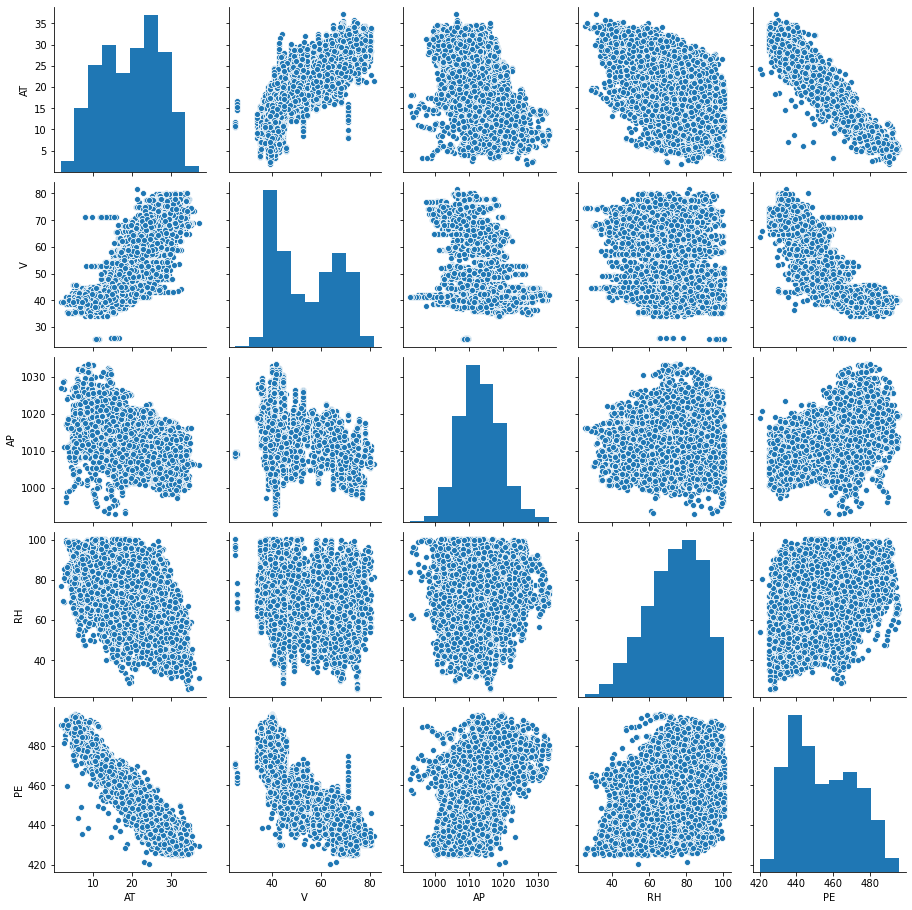

In [6]:
df = pd.read_excel (r'Folds5x2_pp.xlsx')
ax = sns.pairplot(df)

Findings: From the above scatter plots of independent variables v/s dependent variable we see that there is clear negative correlation between AT and PE, V and PE (to some extent) and positive correlation between V and AT

### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [7]:
for column in df:
    print("The name of the column is: {}".format(column))
    print("The mean is: {}".format(df.mean()[column]))
    print("The median is: {}".format(df.median()[column]))
    print("The range is: {}".format(df.max()[column]-df.min()[column]))
    print("The first quartile is: {}".format(df.quantile(q = 0.25)[column]))
    print("The third quartile is: {}".format(df.quantile(q = 0.75)[column]))
    print("The inter-quartile range is: {}".format(df.quantile(q = 0.75)[column] - df.quantile(q = 0.25)[column]))
    print("    ")

The name of the column is: AT
The mean is: 19.65123118729102
The median is: 20.345
The range is: 35.3
The first quartile is: 13.51
The third quartile is: 25.72
The inter-quartile range is: 12.209999999999999
    
The name of the column is: V
The mean is: 54.30580372073601
The median is: 52.08
The range is: 56.2
The first quartile is: 41.74
The third quartile is: 66.54
The inter-quartile range is: 24.800000000000004
    
The name of the column is: AP
The mean is: 1013.2590781772603
The median is: 1012.94
The range is: 40.40999999999997
The first quartile is: 1009.1
The third quartile is: 1017.26
The inter-quartile range is: 8.159999999999968
    
The name of the column is: RH
The mean is: 73.30897784280926
The median is: 74.975
The range is: 74.6
The first quartile is: 63.3275
The third quartile is: 84.83
The inter-quartile range is: 21.502499999999998
    
The name of the column is: PE
The mean is: 454.3650094063554
The median is: 451.54999999999995
The range is: 75.5
The first quartil

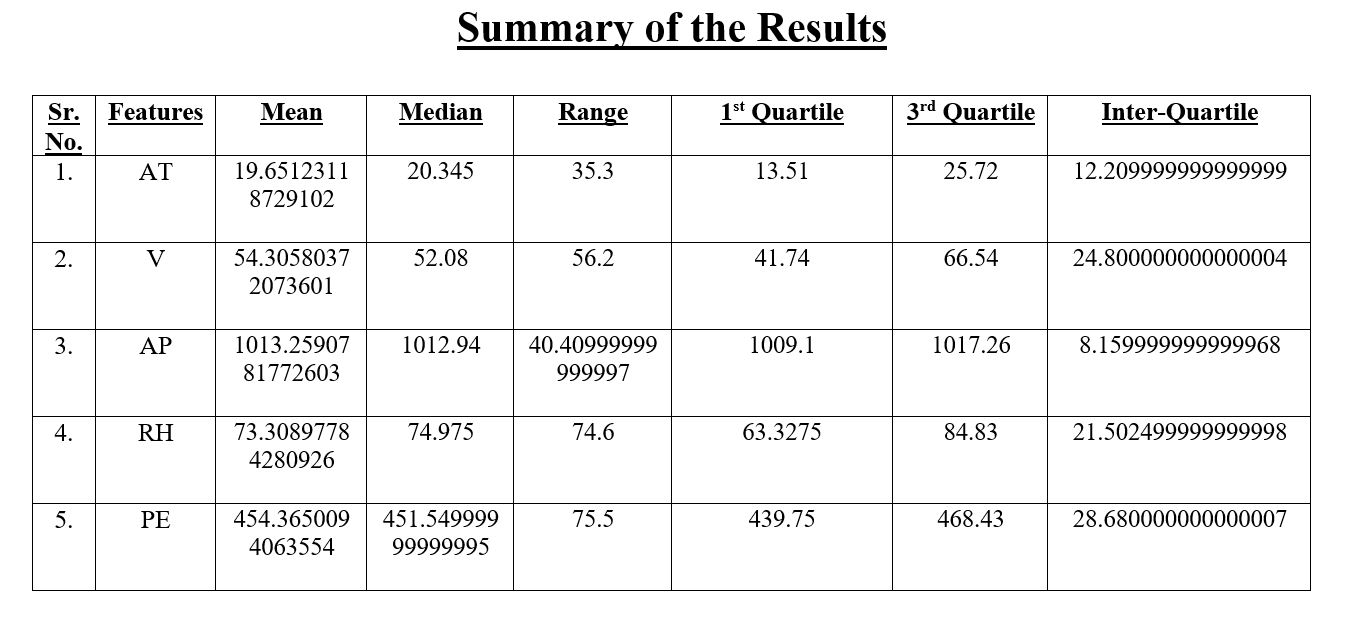

### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks? 

In [8]:
# To determine the Independent(X) and the Dependent variables(y) 

df = pd.read_excel (r'Folds5x2_pp.xlsx')
X = df[df.columns[0:4]]
y = df[df.columns[4]]

In [9]:
X['Intercept'] = np.ones(X.shape[0])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:49   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

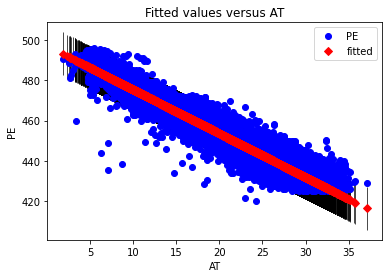

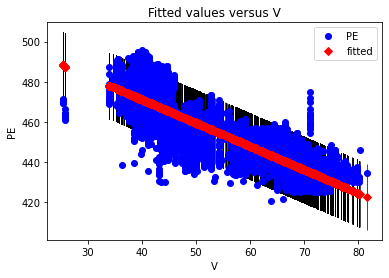

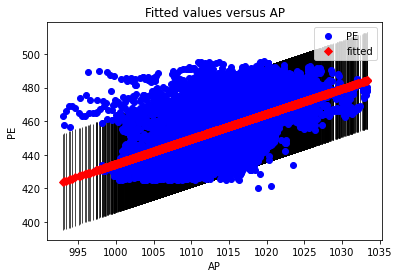

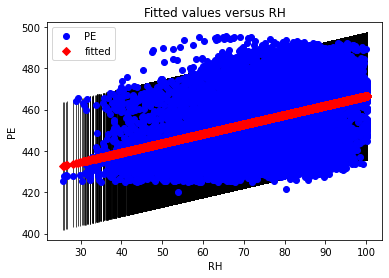

In [10]:
# For Predictors: Ambient Temperature (AT), Exhaust Vaccum (V), Ambient Pressure (AP) and Relative Humidity (RH)

for i in range(0,4):
    model = sm.OLS(y, X[[X.columns[i], X.columns[4]]])
    output = model.fit()
    sm.graphics.plot_fit(output,0)
    print(output.summary())

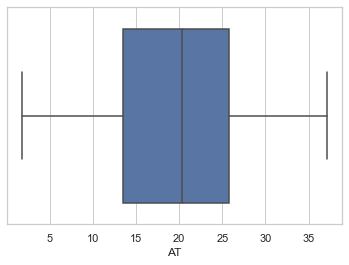

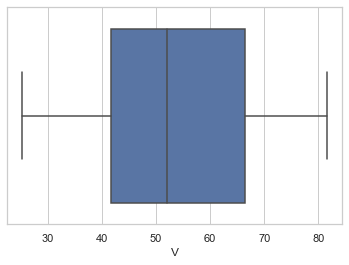

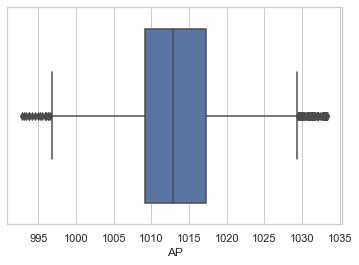

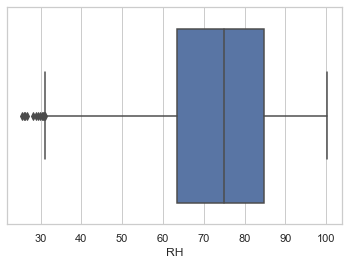

In [11]:
# To find an outlier

sns.set(style="whitegrid")
for index in range(0,4):
    ax = sns.boxplot(X[X.columns[index]])
    plt.show()

From the above graphs and statistical analysis we can see that there is a clear negative correlation between AT and PE and also between V and PE. 

The R - squared value, which is a statistical measure of how close the data are fitted to regression line, is high between AT and PE and V and PE.

The other two graphs, PE vs AP and PE vs RH we can see that there is a slight positive correlation but it seems mostly insignificant because data is spread out and there is not adequate line fitting this data. The R - squared value is also high.

Also, as all the p-values are zero so there is a statistical significance association between the predictor and the response.

There are outliers in AP and RH as we can see from the boxplots which we would like to get rid off.

## (d) Fit a multiple regression model to predict the response using all of the predictors.Describe your results. For which predictors can we reject the null hypothesis H0 : Bj = 0?

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:51   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

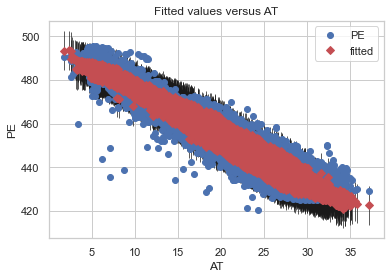

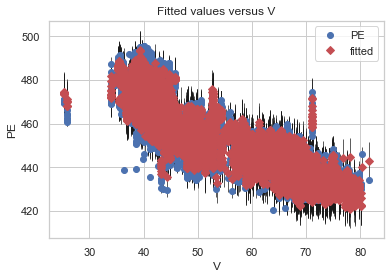

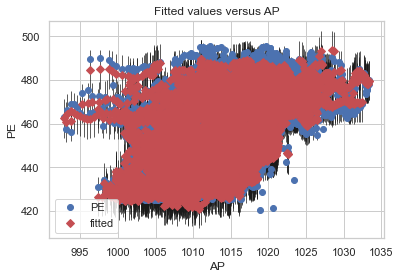

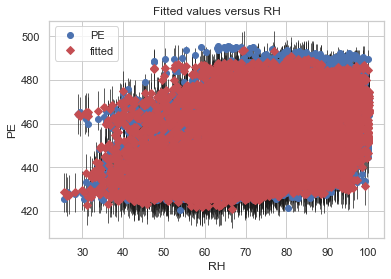

In [12]:
# Multiple Regression Model

model = sm.OLS(y, X)
output = model.fit()
sm.graphics.plot_fit(output,0)
sm.graphics.plot_fit(output,1)
sm.graphics.plot_fit(output,2)
sm.graphics.plot_fit(output,3)
print(output.summary())

We can reject null hypothesis for all predictors because their all of their p values are very low indicating significance.

## (e) How do your results from (c) compare to your results from (d)? Create a plot displaying the univariate regression coefficients from (c) on the x-axis, and the multiple regression coefficients from (d) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

Text(0.5, 1.0, 'Multivariate vs Univariate Regression Coefficients')

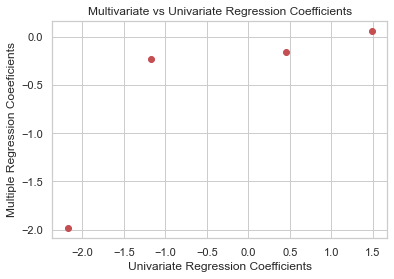

In [13]:
X_coefficients = [-2.1771, -1.1681, 1.4898, 0.4551]
Y_coefficients = [-1.9859, -0.2321, 0.0622, -0.1581]
plt.plot(X_coefficients,Y_coefficients,'ro')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coeeficients')
plt.title('Multivariate vs Univariate Regression Coefficients')

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y = B0 + B1X + B2X2 + B3X3 + e

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:53   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.6103      0.124     -4.941      0.0

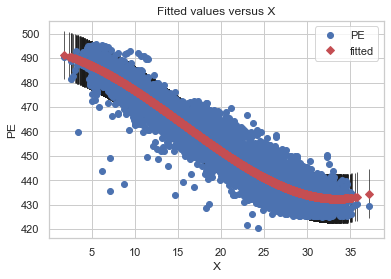

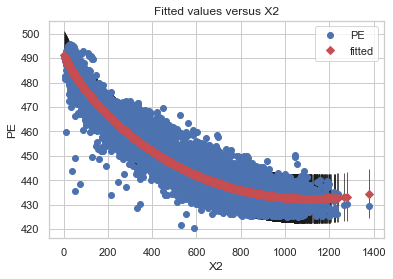

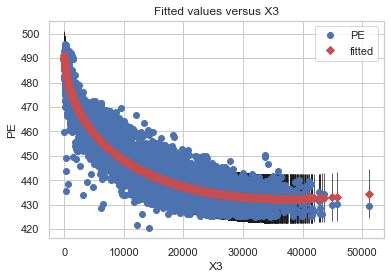

In [14]:
nonlinearRegression(0)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:54   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -2.1444      0.509     -4.214      0.0

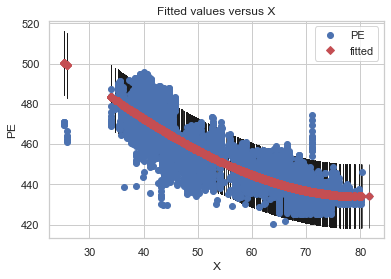

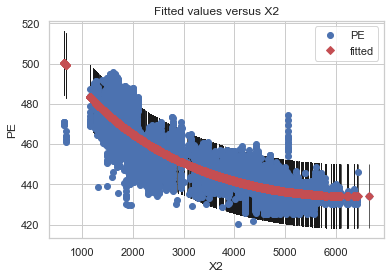

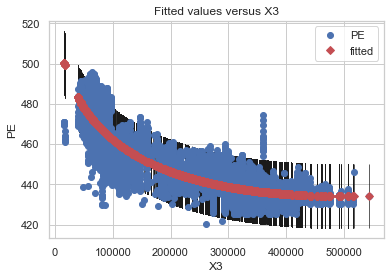

In [15]:
nonlinearRegression(1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:54   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             25.2556      3.001      8.415      0.0

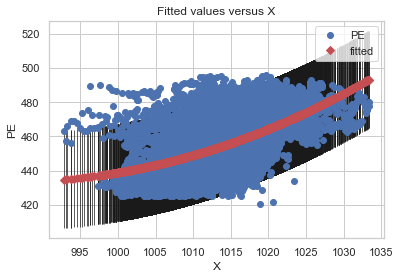

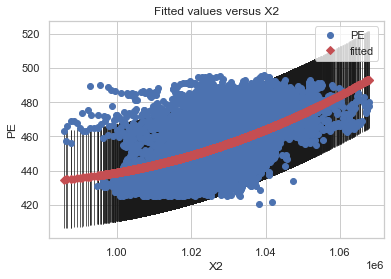

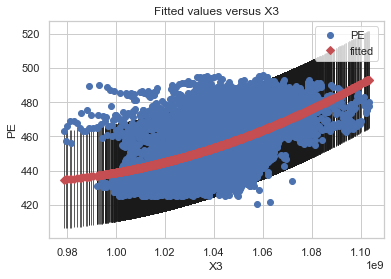

In [16]:
nonlinearRegression(2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:55   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -1.7292      0.486     -3.557      0.0

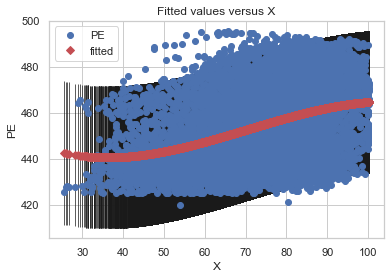

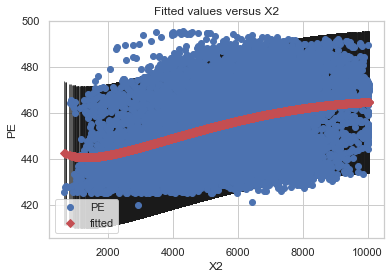

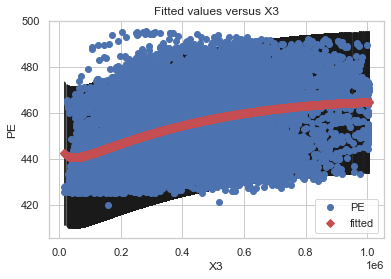

In [17]:
nonlinearRegression(3)

Yes, there is a nonlinear association between the predictor and the response at X = V.

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant. 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.741e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:57   Log-Likelihood:                -27662.
No. Observations:                9568   AIC:                         5.534e+04
Df Residuals:                    9562   BIC:                         5.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.8764      0.033    -85.901      0.0

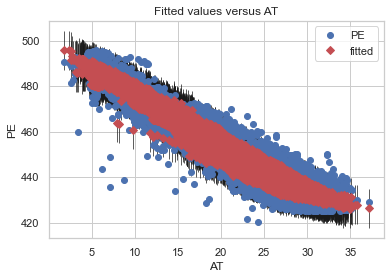

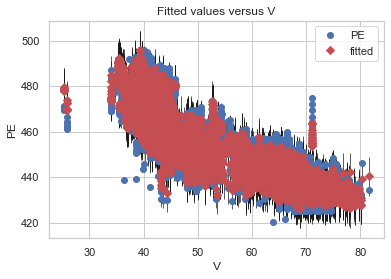

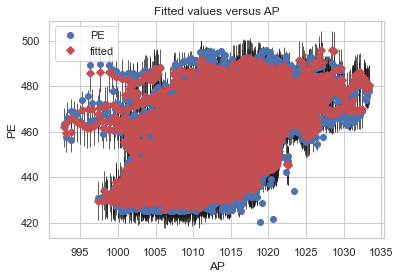

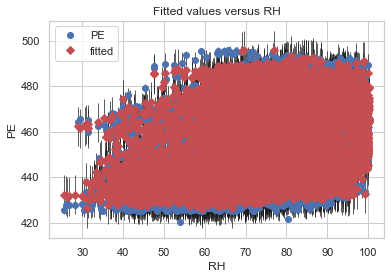

In [18]:
pairwiseRegression(0,1)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.493e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:58   Log-Likelihood:                -28084.
No. Observations:                9568   AIC:                         5.618e+04
Df Residuals:                    9562   BIC:                         5.622e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT             1.2033      1.128      1.066      0.2

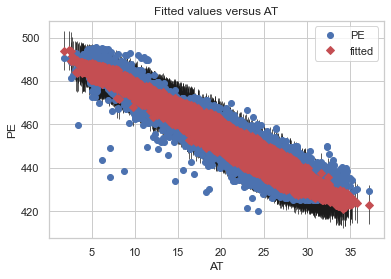

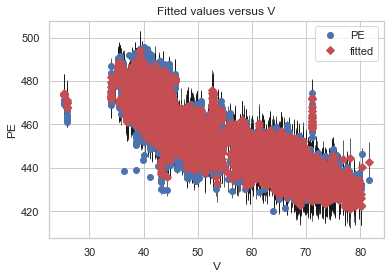

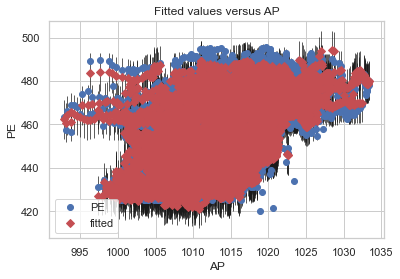

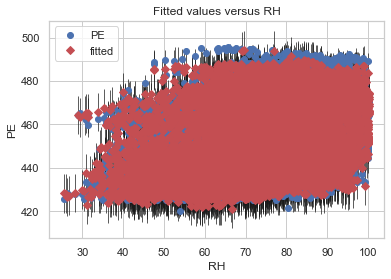

In [19]:
pairwiseRegression(0,2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.627e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:18:59   Log-Likelihood:                -27851.
No. Observations:                9568   AIC:                         5.571e+04
Df Residuals:                    9562   BIC:                         5.576e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.2744      0.035    -36.174      0.0

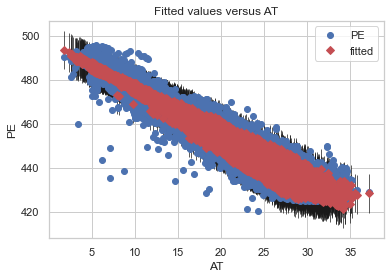

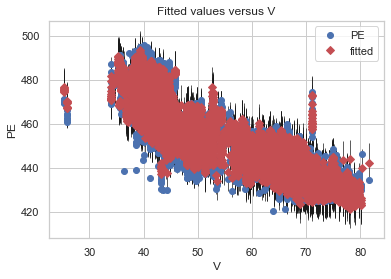

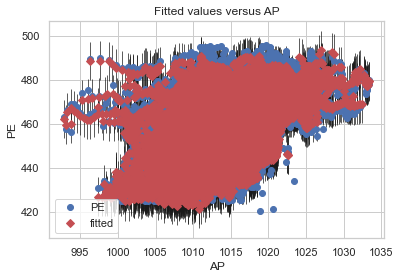

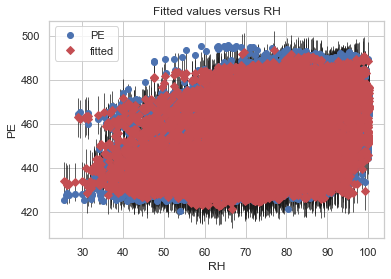

In [20]:
pairwiseRegression(0,3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.492e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:00   Log-Likelihood:                -28086.
No. Observations:                9568   AIC:                         5.618e+04
Df Residuals:                    9562   BIC:                         5.623e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9751      0.015   -128.885      0.0

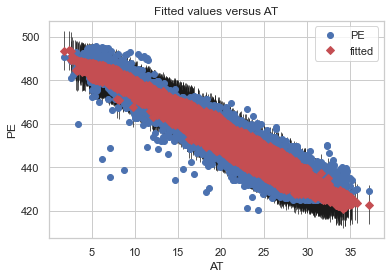

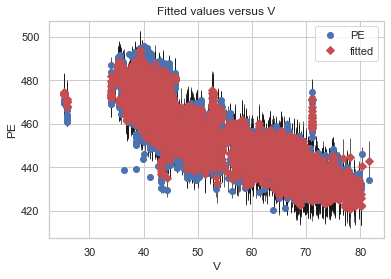

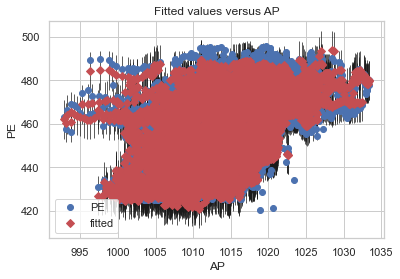

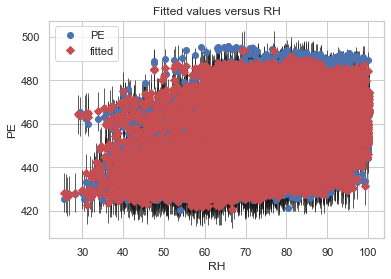

In [21]:
pairwiseRegression(1,2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.626e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:02   Log-Likelihood:                -27853.
No. Observations:                9568   AIC:                         5.572e+04
Df Residuals:                    9562   BIC:                         5.576e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9760      0.015   -132.447      0.0

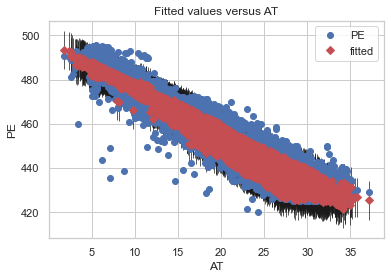

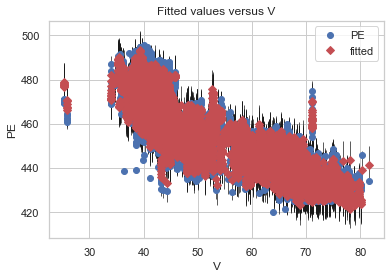

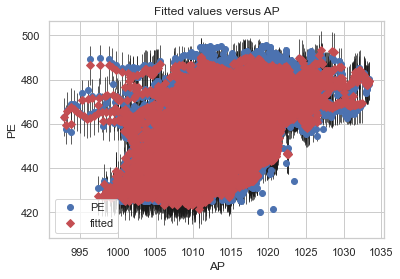

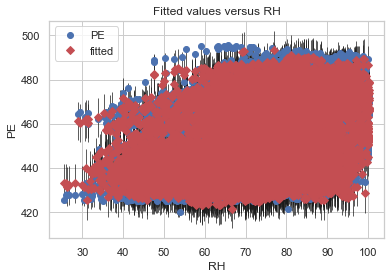

In [22]:
pairwiseRegression(1,3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.497e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:03   Log-Likelihood:                -28077.
No. Observations:                9568   AIC:                         5.617e+04
Df Residuals:                    9562   BIC:                         5.621e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9842      0.015   -129.344      0.0

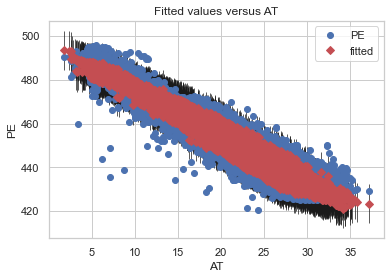

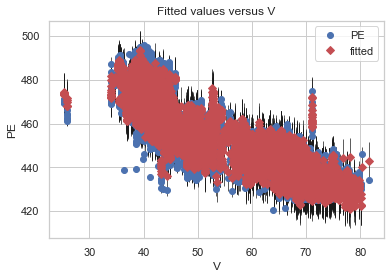

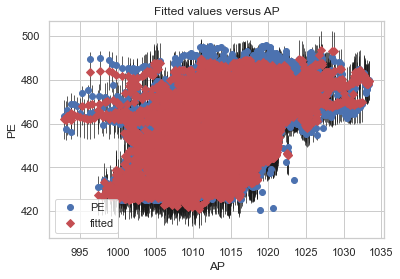

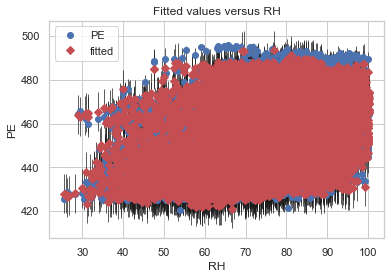

In [23]:
pairwiseRegression(2,3)

From the above statistical analysis we can see that there is interactions of pairwise predictors and responses

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:04   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.0044      0.018   -110.340      0.0

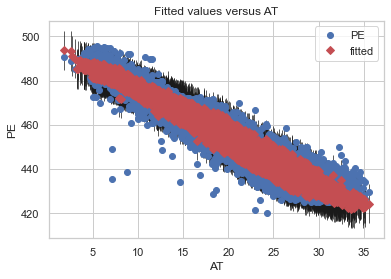

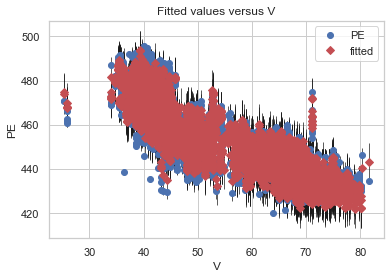

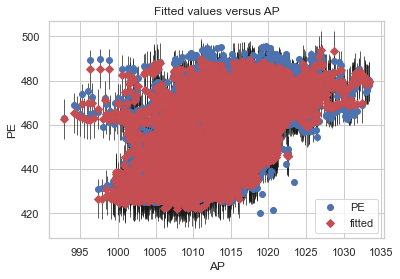

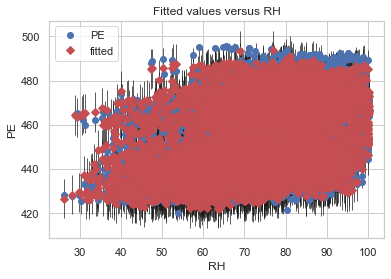

In [25]:
model = sm.OLS(y_train, X_train)
output = model.fit()
sm.graphics.plot_fit(output,0)
sm.graphics.plot_fit(output,1)
sm.graphics.plot_fit(output,2)
sm.graphics.plot_fit(output,3)
print(output.summary())

In [26]:
y_train_pred = output.predict(X_train)

In [27]:
# Train mean squared error of 70% subset data

mean_squared_error(y_train,y_train_pred)

20.580839725738695

In [28]:
y_test_pred = output.predict(X_test)

In [29]:
# Test mean squared error of 70% subset data

mean_squared_error(y_test,y_test_pred)

21.23985693822234

In [30]:
X_train_all = nonLinearInteractiveRegression(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:05   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -7.2885      3.628     -2.009      0.0

In [31]:
X_new_train = X_train_all.drop(columns = ['AT x AP','V x V','V x AP','V x RH'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:05   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.4293      0.100    -24.221      0.0

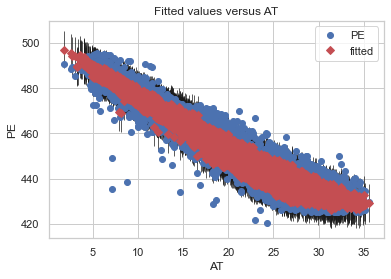

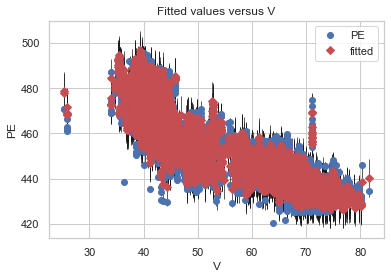

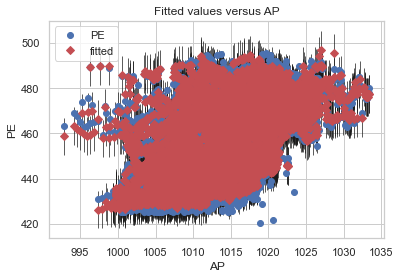

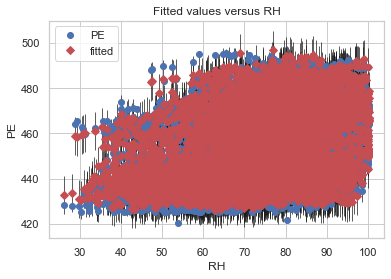

In [32]:
model = sm.OLS(y_train, X_new_train)
output = model.fit()
sm.graphics.plot_fit(output,0)
sm.graphics.plot_fit(output,1)
sm.graphics.plot_fit(output,2)
sm.graphics.plot_fit(output,3)
print(output.summary())

In [33]:
y_new_train_pred = output.predict(X_new_train)

In [34]:
mean_squared_error(y_train,y_new_train_pred)

17.917812671185718

In [35]:
X_test_all = nonLinearInteractiveRegression(X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3028.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:19:06   Log-Likelihood:                -8262.6
No. Observations:                2871   AIC:                         1.656e+04
Df Residuals:                    2856   BIC:                         1.664e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.5494      5.923     -0.262      0.7

In [36]:
X_new_test = X_test_all.drop(columns = ['AT x AP','V x V','V x AP','V x RH'])

In [37]:
y_new_test_pred = output.predict(X_new_test)

In [38]:
mean_squared_error(y_test,y_new_test_pred)

18.694346190804485

Above we can see interactions between all types of predictors i.e. pairwise, squared variables with responses. Looking at the p values we can see p values of AT x AP, V x V, V x AP and V x RH are quite large. Thus they are insignificant in comparision to the rest and thus drop the. Taking threshold as 0.05.

## (i) KNN Regression:
## i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k E {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

Best testing error normalized: 18.35373798182979
Best testing error raw: 15.726819842563568
Best k*value: 5
Best k*value: 12


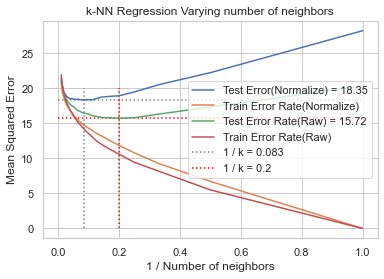

In [39]:
# Normalized data
transformer = Normalizer().fit(X)
X_train_normalize = transformer.transform(X)

# KNN Regressor
k_values=[]
alternative_k = np.arange(1, 101)
train_error_normalized=[]
train_error=[]
test_error_normalized=[]
test_error=[]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_train_normalize, y,test_size=0.3, random_state=42)

for k in range(1,101,1):
    knn_normalize = KNeighborsRegressor(n_neighbors=k).fit(X_train_normalized, y_train_normalized)
    knn_raw = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    
    y_train_normalized_predict = knn_normalize.predict(X_train_normalized)
    y_test_normalized_predict = knn_normalize.predict(X_test_normalized)
    y_train_predict = knn_raw.predict(X_train)
    y_test_predict = knn_raw.predict(X_test)
    
    train_error_normal = mean_squared_error(y_train_normalized,y_train_normalized_predict)
    test_error_normal = mean_squared_error(y_test_normalized, y_test_normalized_predict)
    
    train_error_raw = mean_squared_error(y_train, y_train_predict)
    test_error_raw = mean_squared_error(y_test, y_test_predict)
    
    train_error_normalized.append(train_error_normal)
    train_error.append(train_error_raw)
    
    test_error_normalized.append(test_error_normal)
    test_error.append(test_error_raw)
    k_values.append(k)

lowest_error_test_normal = np.amin(test_error_normalized)
lowest_error_test_raw = np.amin(test_error)
print("Best testing error normalized: {}".format(lowest_error_test_normal))
print("Best testing error raw: {}".format(lowest_error_test_raw))
k_star_raw = k_values[np.where(np.array(test_error) == np.amin(np.array(test_error)))[0][0]]
print("Best k*value: {}".format(k_star_raw))
k_star_normalized = k_values[np.where(np.array(test_error_normalized) == np.amin(np.array(test_error_normalized)))[0][0]]
print("Best k*value: {}".format(k_star_normalized))

plt.title('k-NN Regression Varying number of neighbors')
plt.plot(1 / alternative_k, test_error_normalized,label='Test Error(Normalize) = ' + str(lowest_error_test_normal)[:5])
plt.plot(1 / alternative_k, train_error_normalized, label='Train Error Rate(Normalize)')
plt.plot(1 / alternative_k, test_error,label='Test Error Rate(Raw) = ' + str(lowest_error_test_raw)[:5])
plt.plot(1 / alternative_k, train_error, label='Train Error Rate(Raw)')
plt.vlines(1 / k_star_normalized, 0, 20, colors='gray', label='1 / k = ' + str(1 / k_star_normalized)[:5],linestyles='dotted')
plt.hlines(lowest_error_test_normal, 0, 1, colors='gray', linestyles='dotted')
plt.vlines(1 / k_star_raw, 0, 20, colors='red', label='1 / k = ' + str(1 / k_star_raw)[:5],linestyles='dotted')
plt.hlines(lowest_error_test_raw, 0, 1, colors='red', linestyles='dotted')
plt.legend()
plt.grid(True)
plt.xlabel('1 / Number of neighbors')
plt.ylabel('Mean Squared Error')
plt.show()

##  (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

As I got the Linear Regression Model smallest test error (MSE) is 18.69 from (h). But the KNN Regression MSE in raw data form is 15.72 from (i). Based on what I got, I conclude that KNN regression model is more optimal than Multiple Linear Regression model on this issue.

KNN Performs better than Linear regression because it more flexible and thus can fit the data better as data has large number of samples and few predictors. Thus KNN is able to model the data correctly giving both train and test errors lower than that of the best regression model.

# 2.) ISLR: 2.4.1

(a) A flexible model will perform better in general. Because of the large sample size, we’re less likely to overfit even when using a more flexible model. Meanwhile, a more flexible model tends to reduce bias.

(b) An inflexible model will perform better in general. A flexible model will cause overfitting because of the small sample size. This usually means a bigger inflation in variance and a small reduction in bias.

(c) A flexible model will perform better in general because it’ll be necessary to use a flexible model to find the non-linear effect.

(d) An inflexible model will perform better in general. Because a flexible model will capture too much of the noise in the data due to the large variance of the errors.

# 3.) ISLR: 2.4.7

(a) The Euclidean distance formula in 3 dimension is sqrt((Xa - Xb)^2 + (Ya - Yb)^2 + (Za - Zb)^2)
    
    distance(A,Z) = sqrt(0 + 3^2 + 0) = sqrt(9) = 3
    distance(B,Z) = sqrt(2^2 + 0 + 0) = sqrt(4) = 2
    distance(C,Z) = sqrt(0 + 1^2 + 3^2) = sqrt(10) = 3.2
    distance(D,Z) = sqrt(0 + 1^2 + 2^2) = sqrt(5) = 2.2
    distance(E,Z) = sqrt((-1)^2 + 0 + 1^2) = sqrt(2) = 1.41
    distance(F,Z) = sqrt(1^2 + 1^2 + 1^2) = sqrt(3) = 1.7
    
(b) From the distances, it is clear that the 5th observation is the closest data point and the 5th is green so the test point (0,0,0) is Green.

(c) From the distances, we know the first three closest data point are 2nd, 5th, and 6th, and in these three datapoints, 2 are Red points and 1 is Green point so the test point will be Red point.

(d) The Bayes decision boundary is non-linear, so the model has high flexibility, but when K is increasing, the model's flexibility will decrease. So a high flexibility model suggests a lower K. So, we should expect the best value for K to be small.